In [2]:
import mysql.connector
import pandas as pd
import numpy as np  
from matplotlib import pyplot as plt
import seaborn as sns
import json

mydb = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Mala2ki7!",
    database="userDB"
)

df = pd.read_sql('SELECT * FROM reaction_info', con=mydb)

user_id_start = 91
df = df[(df.id >= user_id_start) | (df.id == 0)].drop_duplicates()

question_columns = list(df.columns[4:-2])
columns = list(df.columns)
columns

['id', 'switch_type', 'srt', 'dpt']

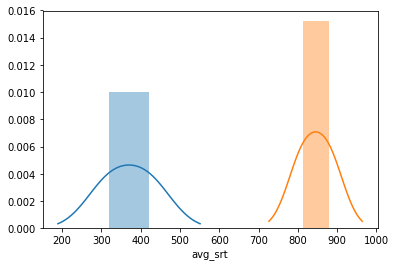

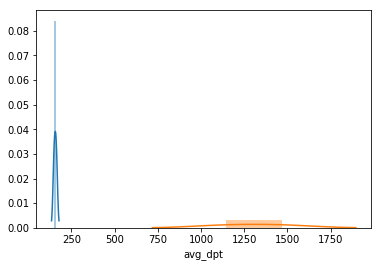

In [5]:
df["avg_srt"] = np.nan
df["avg_dpt"] = np.nan
for id in list(set(df.id)):
    for switch_type in list(set(df[df.id == id].switch_type)):
        srts = json.loads(df[(df.id == id) & (df.switch_type == switch_type)].srt.values[0])
        dpts = json.loads(df[(df.id == id) & (df.switch_type == switch_type)].dpt.values[0])
        
        df.loc[(df.id == id) & (df.switch_type == switch_type), 'avg_srt'] = np.average(srts)
        df.loc[(df.id == id) & (df.switch_type == switch_type), 'avg_dpt'] = np.average(dpts)
df = df.replace({'motion': 'webcam'})
df = df.replace({'face': 'webcam'})

sns.distplot(df[df.switch_type == "button"].avg_srt)
sns.distplot(df[df.switch_type == "webcam"].avg_srt)
plt.show()

sns.distplot(df[df.switch_type == "button"].avg_dpt)
sns.distplot(df[df.switch_type == "webcam"].avg_dpt)
plt.show()
